# Final Phase Project, Douglas McArthur
This notebook demonstrates the implementation of the final phase of the synoptic project, showing how the previous development of a multipartite graph solution can be used to store the data required to simulate the outputs of an opinion model. 

The submission is broken into 4 parts:

1. Simulation using default paramters at various time periods0
2. Demonstration of the effects of beta_update and lambda_distance on simulation outputs
3. Elbow plot and plot, KMeans cluster demonstration
4. Demonstration of ensemble statistics and exploration of linear regression

## Code Setup
The source for this notebook is called "report.ipynb" and can be found in the root of the Python project. As well as importing the required code libraries, it was necessary to add a temporary environment variable to prevent a warning message relating to KMeans having a memory leak issue on Windows.

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from simulation import Simulation
from settings import Settings

## Part 1 - default behaviour
The following sections demonstrate running the simulation at time points 0, 1, 2, 3, 5, and 10. Default settings are used for each run. Note that at time 0 the network is in an initialised state with respect to opinions, and all activities are plotted. Subsequent executions plot only activities that are active within a pariticular activity period.

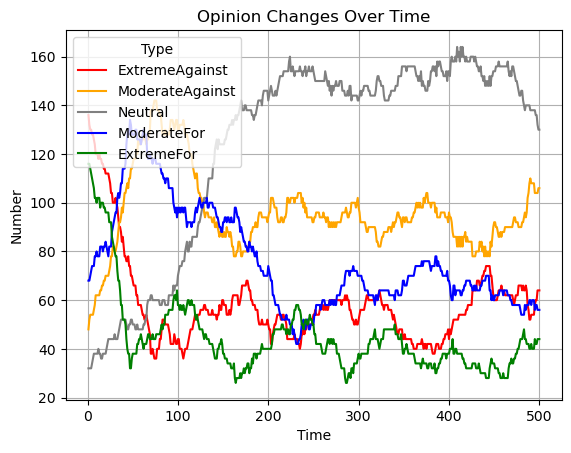

In [5]:
settings = Settings()
s = Simulation(settings)
s.run()
s.chart()

NOTE: The result of running the simulation with default settings is shown in the plot above. I had expected there to be a higher initial count of neutral invidivuals compared to positive and negative, before remembering that a neutral individual is assigned an opinion randomly between 0 and 1. The specification of the overall summary statistics was to assign opinions of the range between 0.4 and 0.6 to the neutral category, so some unbiased individuals will fall into non-neutral categories. Perhaps a better implementation would have been to standardise "neutral" and "unbiased" to mean the same thing and avoid this confusion?

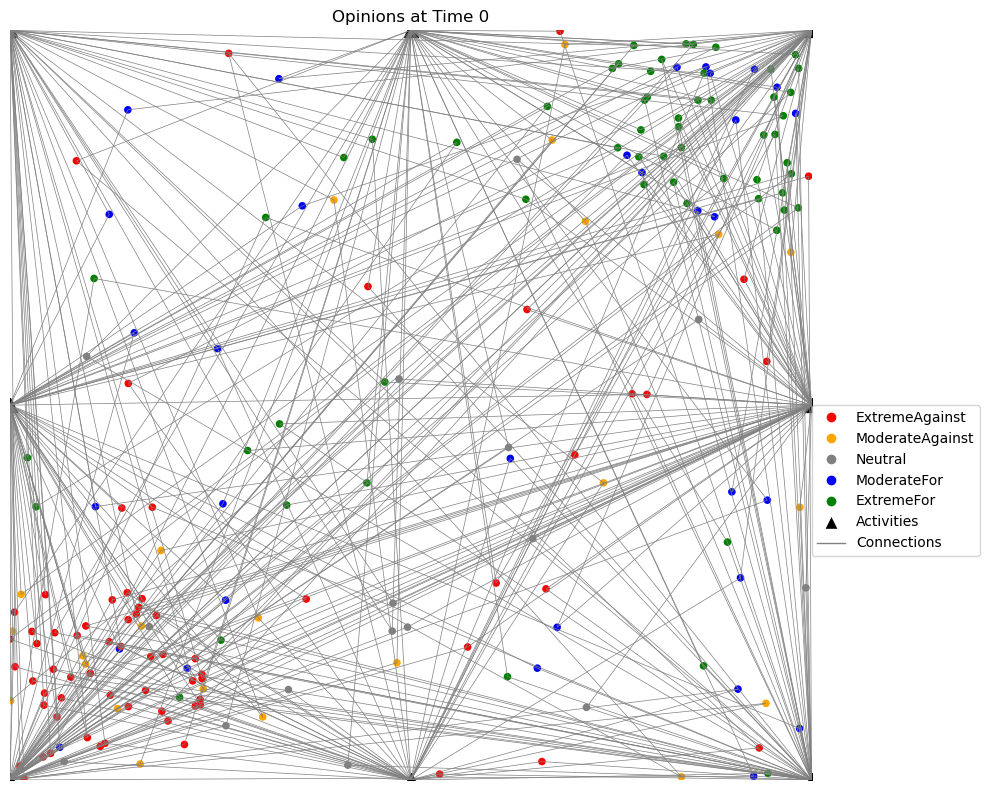

In [7]:
s.plot_network(0)

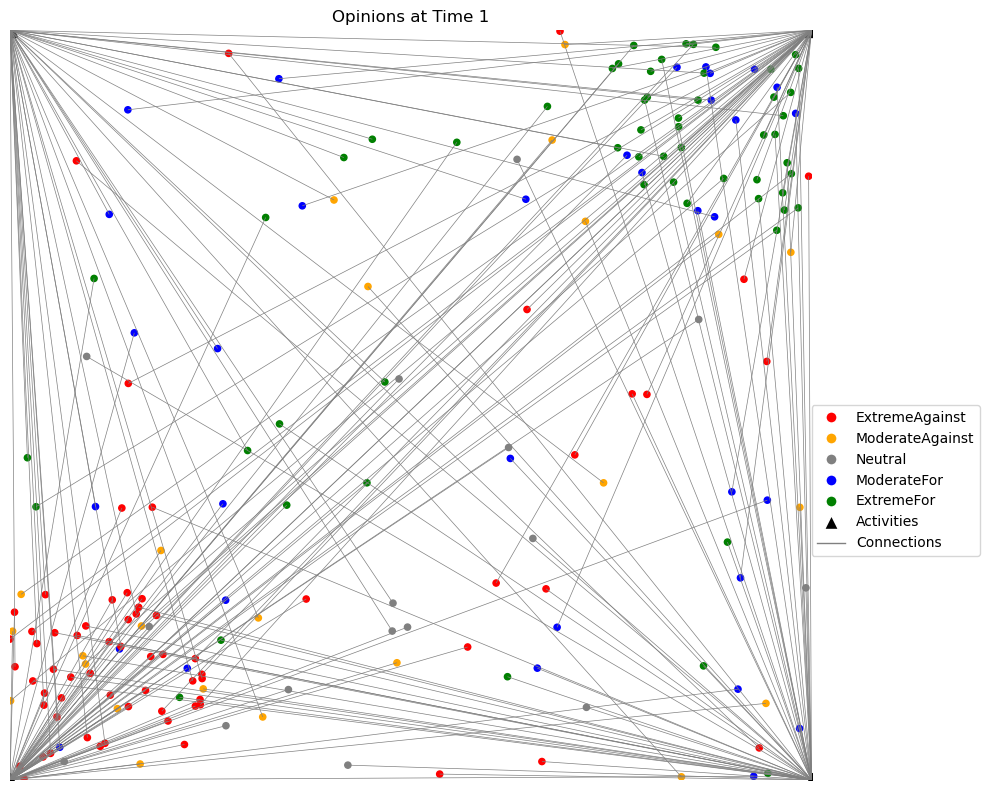

In [8]:
s.plot_network(1)

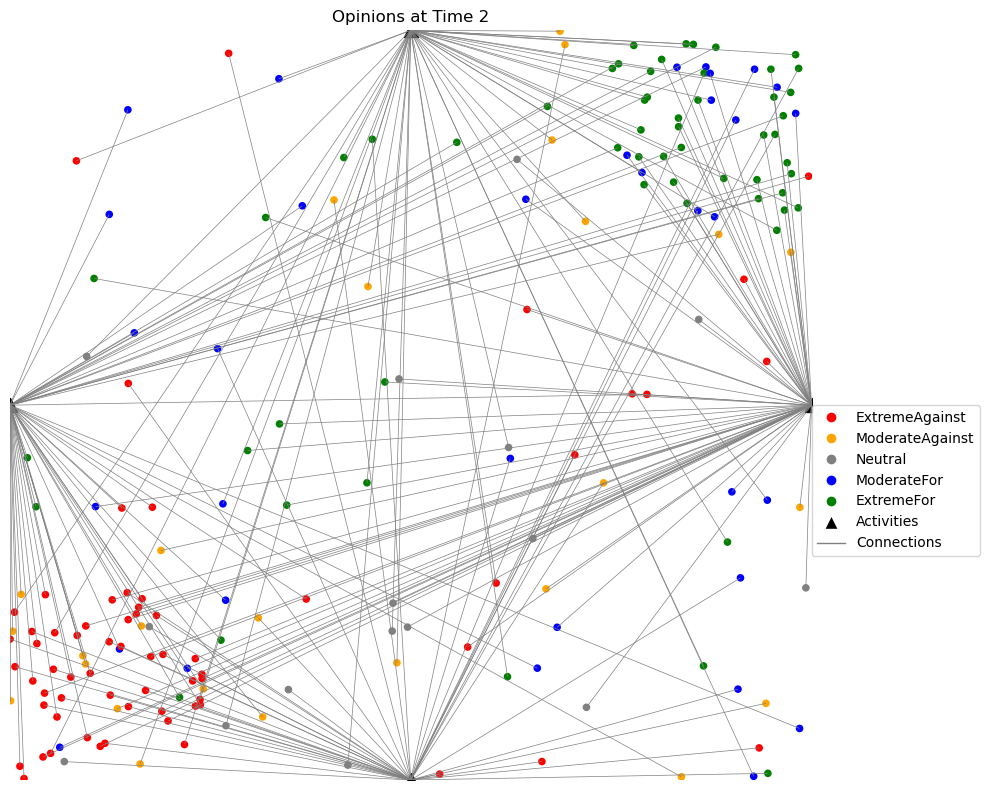

In [9]:
s.plot_network(2)

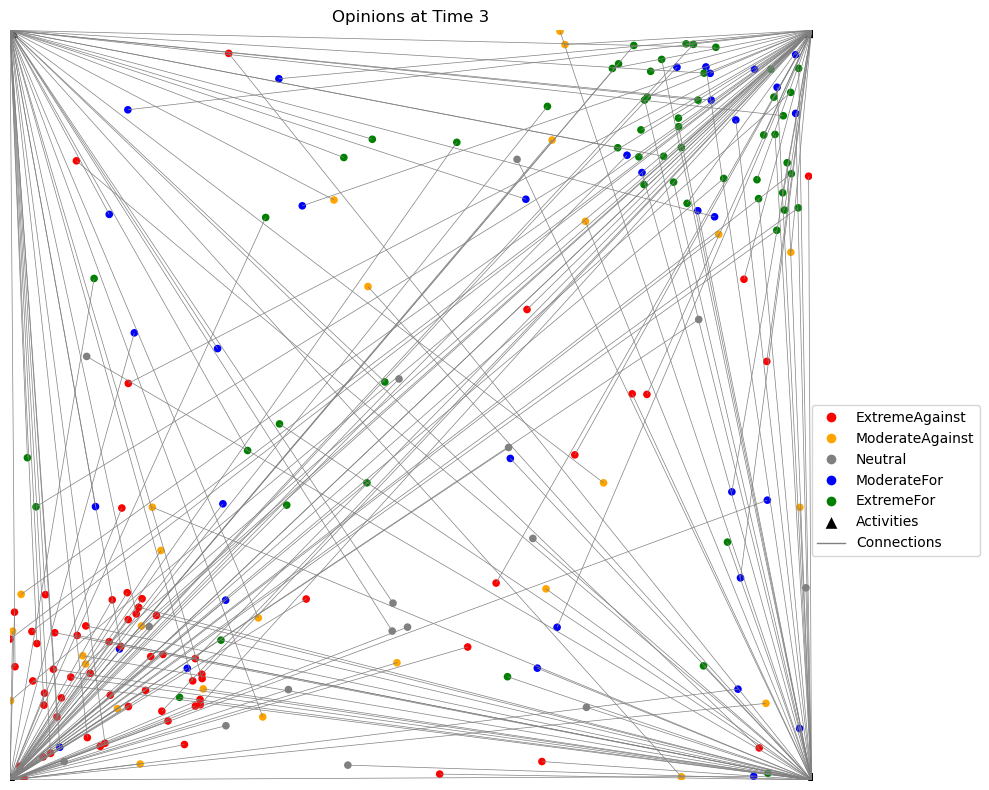

In [10]:
s.plot_network(3)

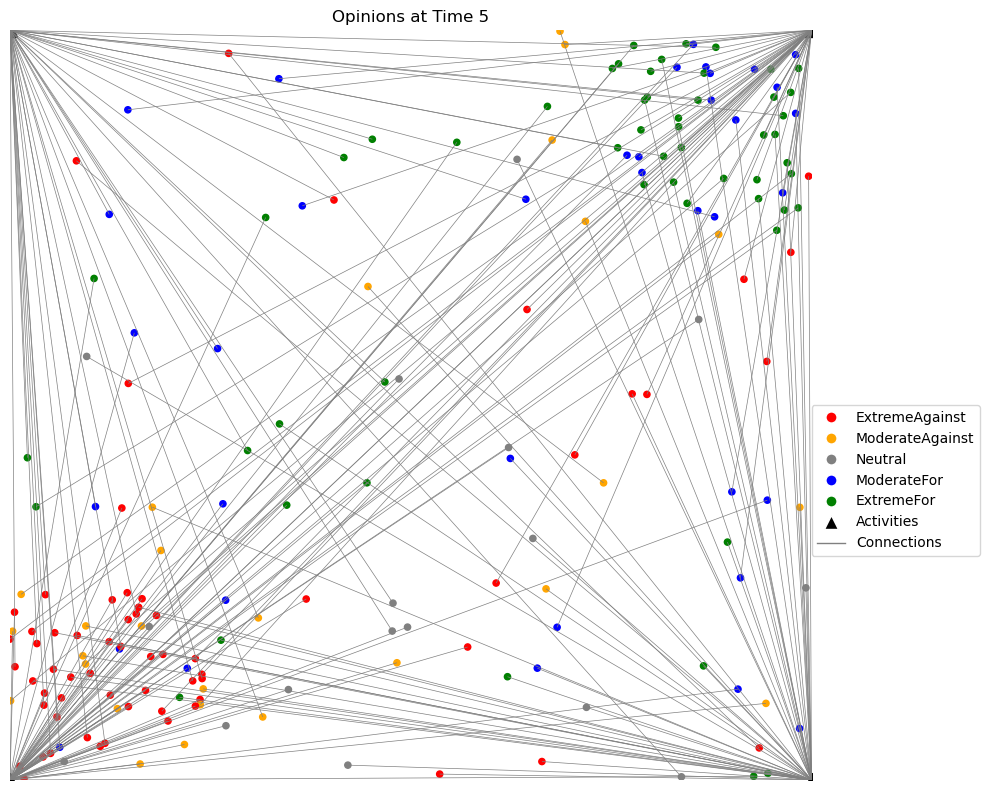

In [11]:
s.plot_network(5)

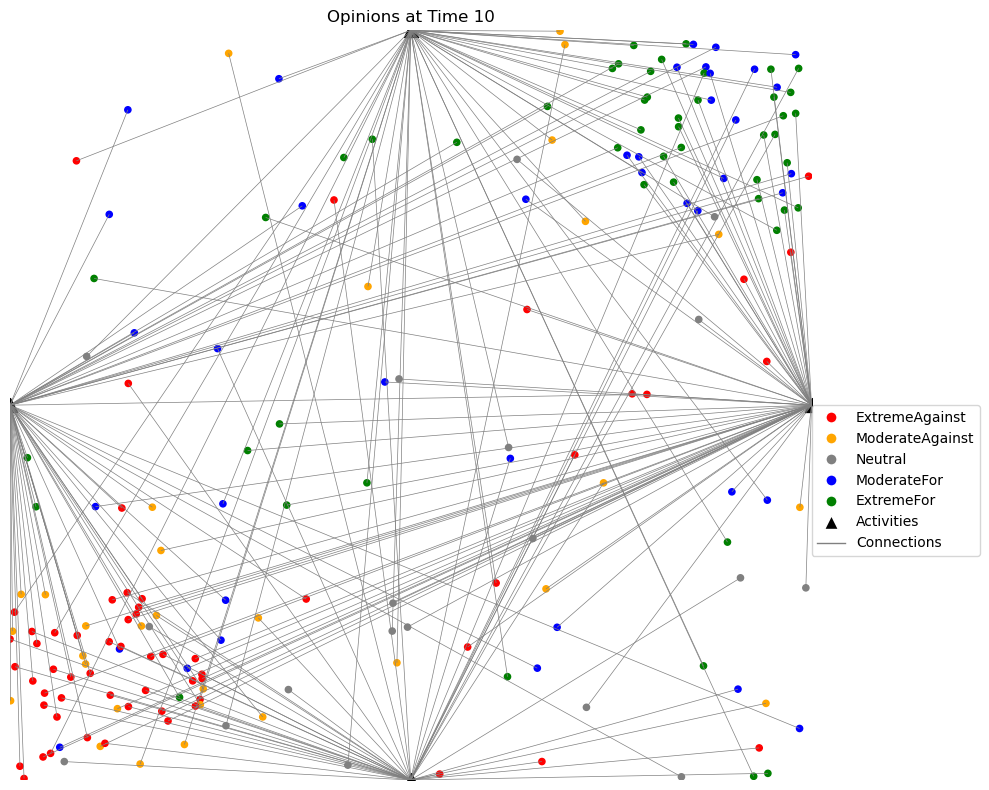

In [12]:
s.plot_network(10)

## Part 2 - parameter effects

### Beta_update=0
Running the simulation with beta_update set to zero results in both extreme for and extreme against counts slowly rising over time because only the gamma_extr factor has any bearing on opinion change. The other opinion categories remain reasonably stable, declining gradually towards zero as extreme opinions rise. This is illustrated in the plot, below. 

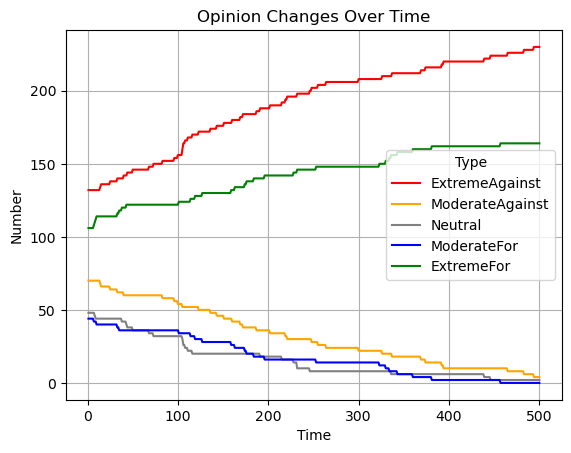

In [15]:
settings = Settings(beta_update=0)
s = Simulation(settings)
s.run()
s.chart()

### Default settings (Beta_update=0.01)

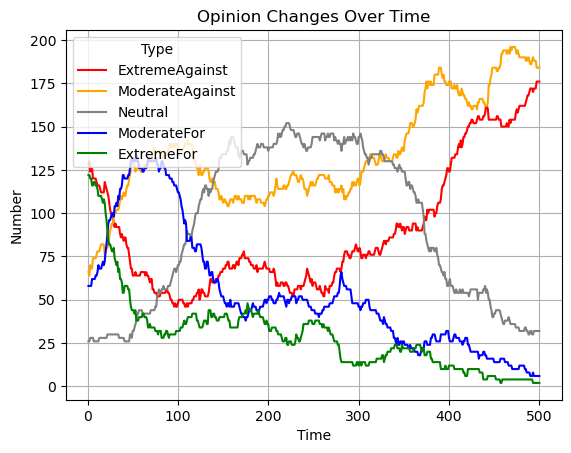

In [17]:
settings = Settings()
s = Simulation(settings)
s.run()
s.chart()

### lambda_dist=100
With lambda_dist equal to 100, the simulation produces distinct clusters of individuals at their nearest activities because individuals are more likely to be placed geographically in the closest activities. This clustering effect then results in fewer interactions between individuals who are far apart, reducing the overall diversity of opinion interactions. This is visualised in the plots, below, where extreme views gradually rise due to greater local interactions, with other opinions gradually declining. The network clearly shows the distinct clustering effect, where individuals are allocated to the closest activities.

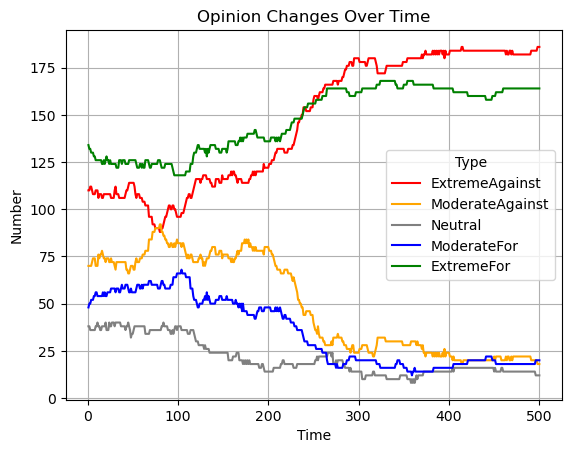

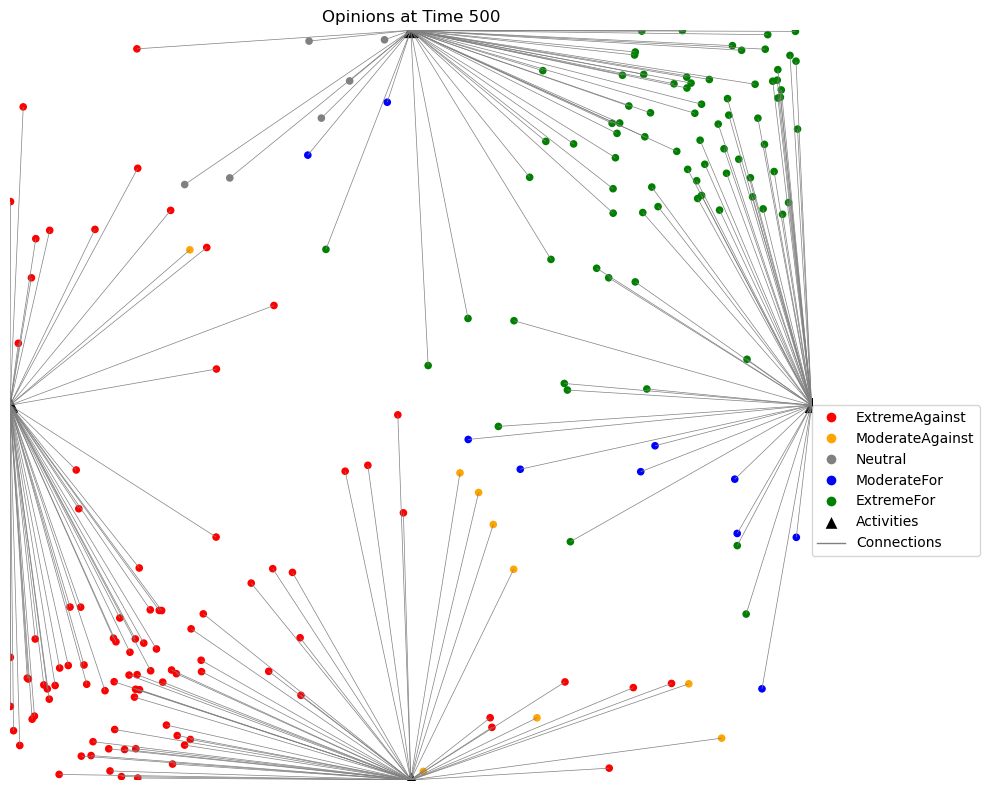

In [19]:
settings = Settings(lambda_dist=100)
s = Simulation(settings)
s.run()
s.chart()
s.plot_network(500)

## Part 3 - KMeans clustering

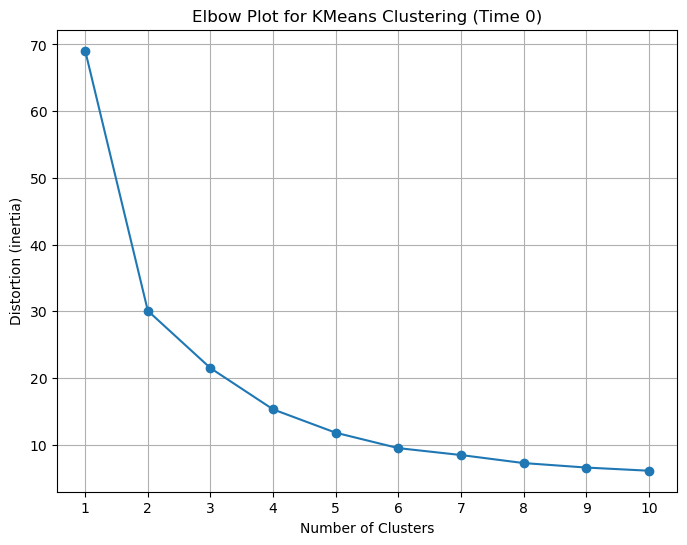

In [60]:
settings = Settings(lambda_dist=20, beta_update=0.1, beta_spread=0.01)
s = Simulation(settings)
s.run()
s.get_elbow_plot(0)

### At Time t=0: Initial Conditions
Initially there are 200 individuals randomly distributed across the simulated space. At this point, clustering primarily reflects random distributions, where individuals are associated with the closest activity due to lambda_dist=20. Therefore, opinions are not yet significantly influenced by interactions, so clusters based on opinions will not be prominent. There is no clear "elbow" because the clusters are mostly distributed around activities rather than influenced by opinions or interactions.

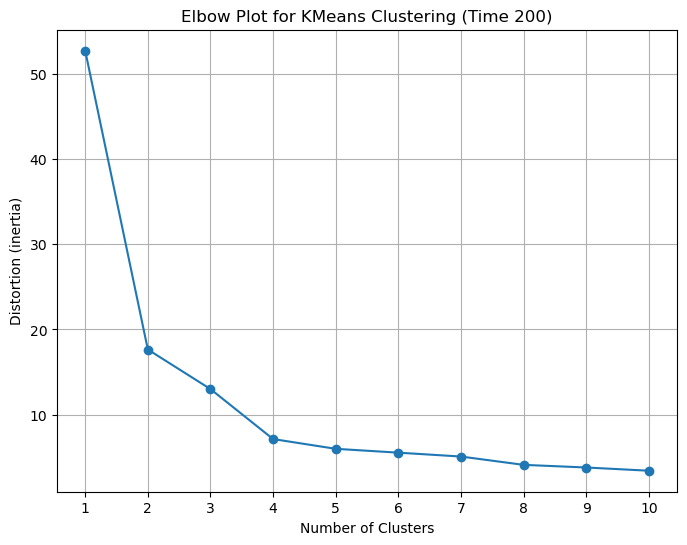

In [62]:
s.get_elbow_plot(200)

### At Time t=200: Evolved Simulation
After 200 time steps, individuals have undergone opinion updates and movement due to activity participation and interactions with others. Stronger clustering of opinions is shown, with distinct groups of individuals around extreme opinions (close to 0 or 1). A clearer "elbow" emerges because the clusters are more distinct (in both opinion and location dimensions) compared to t=0. The plot suggests a choice of k=4 clusters. The effects of the behaviour described above are illustrated by the kmeans plot shown below.

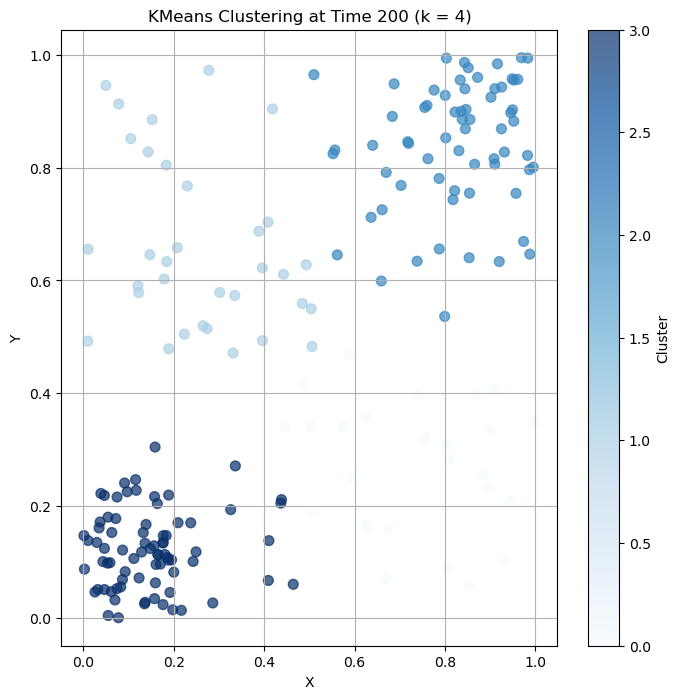

In [64]:
s.kmeans_clustering(200, 4)

## Part 4

### Ensemble Statistics
Note that running the following code with a large n value will take a considerable amount of time to complete. 

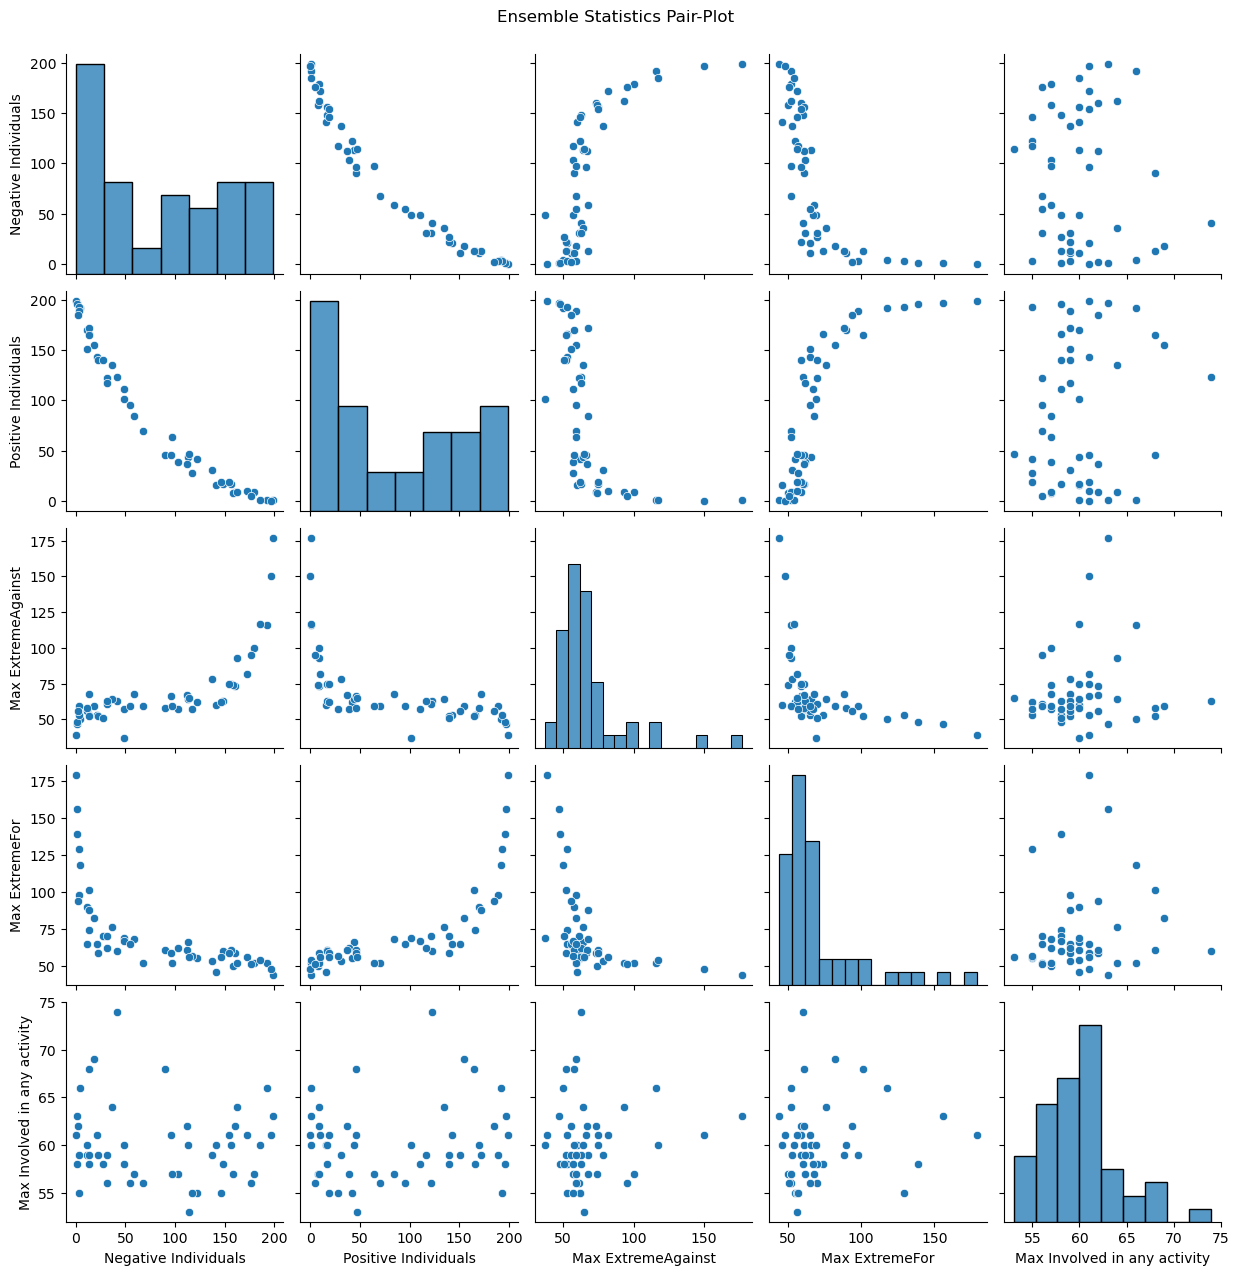

Negative Individuals  Positive Individuals  Max ExtremeAgainst  \
0                    160                     9                  73   
1                    141                    16                  60   
2                    156                    17                  75   
3                      4                   192                  50   
4                     41                   123                  63   
5                     21                   143                  53   
6                    158                     8                  74   
7                     22                   140                  52   
8                    192                     1                 116   
9                      1                   197                  47   
10                   179                     9                 100   
11                   122                    42                  62   
12                   148                    17                  63   
13                    13                   166                  53   
14                   199                     1                 177   
15                   113                    44                  64   
16                   154                    19                  75   
17                   103                    39                  57   
18                    18                   155                  59   
19                    36                   135                  64   
20                   185                     1                 117   
21                    68                    70                  59   
22                   197                     0                 150   
23                    11                   151                  56   
24                    59                    84                  68   
25                    90                    46                  58   
26                   137                    31                  78   
27                     0                   199                  39   
28                    11                   170                  58   
29                     1                   196                  48   
30                    27                   140                  51   
31                   146                    19                  62   
32                    13                   172                  68   
33                    96                    46                  66   
34                   162                     9                  93   
35                    31                   122                  61   
36                   172                    10                  82   
37                     3                   193                  53   
38                    97                    64                  59   
39                    49                   101                  37   
40                    31                   117                  63   
41                    13                   165                  52   
42                    49                   111                  57   
43                   112                    37                  67   
44                    55                    95                  59   
45                   176                     5                  95   
46                   117                    28                  57   
47                   114                    47                  65   
48                     3                   189                  59   
49                     2                   185                  56   

    Max ExtremeFor  Max Involved in any activity  
0               59                            62  
1               46                            60  
2               61                            60  
3              118                            66  
4               60                            74  
5               65                            61  
6               50                            57  
7               59       

In [28]:
settings = Settings()
Simulation.ensemble_statistics(50, settings)

### Linear Regression Exploration

This section demonstrates using the regression fitting functionality to find a good model based on adjusted R² (this is purely to show how the functionality might be used - there are better approaches available). The demonstration continues by using cross validation to test each model and score them using a Mean Square Error metric, then shows some example regression line plots (illustrating how poor the regression models are!).

In [31]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd
import numpy as np

settings = Settings()
simulation = Simulation(settings)
simulation.run()
print(simulation.activity_summary(500))

category  ExtremeAgainst  ModerateAgainst  Neutral  ModerateFor  ExtremeFor
Activity                                                                   
11640                 53                6        0            0           0
11641                 29               19        1            0           0
11642                 22               20        0            1           0
11643                 17               16       12            3           1
11644                 40               12        2            0           0
11645                 39                7        1            1           0
11646                 27               22        4            1           0
11647                 15               20        6            2           1


In [32]:
def find_best_model(simulation, predictors_pool):
    """
    Find the best model based on adjusted R² using exhaustive search over all predictor combinations.
    
    Args:
        simulation: Instance of the simulation class with `fit_regression_model` defined.
        predictors_pool (list): List of all potential predictors.
    
    Returns:
        Best model summary and the set of predictors used.
    """
    best_model = None
    best_adj_r2 = -np.inf
    best_predictors = None

    # Test all possible combinations of predictors
    for r in range(1, len(predictors_pool) + 1):  # Iterate over subset sizes
        for subset in combinations(predictors_pool, r):
            model = simulation.fit_regression_model(predictors=list(subset))
            adj_r2 = model.rsquared_adj  # Adjusted R²
            
            # Check if this model is "better"
            if adj_r2 > best_adj_r2:
                best_model = model
                best_adj_r2 = adj_r2
                best_predictors = subset

    return best_model, best_predictors

In [33]:
# Define the list of all potential predictors
predictors_pool = [
    "InitialOpinion",
    "DistanceToCentre",
    "NearestActivityDistance"
] 

# Find the best model
best_model, best_predictors = find_best_model(simulation, predictors_pool)

print(f"Best Adjusted R²: {best_model.rsquared_adj}")
print(f"Best Predictors: {best_predictors}")

# Compare to full model
full_model = simulation.fit_regression_model()
print(f"Full model Adjusted R²: {full_model.rsquared_adj}")

Best Adjusted R²: 0.127981661328451
Best Predictors: ('InitialOpinion', 'DistanceToCentre')
Full model Adjusted R²: 0.31961554697970673


#### Cross Validation

In [35]:
mse_0 = simulation.cross_validate_model() # Full model
mse_1 = simulation.cross_validate_model(["InitialOpinion"])
mse_2 = simulation.cross_validate_model(["InitialOpinion", "DistanceToCentre"])
mse_3 = simulation.cross_validate_model(["InitialOpinion", "DistanceToCentre", "NearestActivityDistance"])
print(f"0: {mse_0} 1: {mse_1} 2: {mse_2} 3: {mse_3}")

0: 0.011786690209547823 1: 0.015765147073364818 2: 0.015662808295002623 3: 0.01617160721557917


#### Plots of regression lines

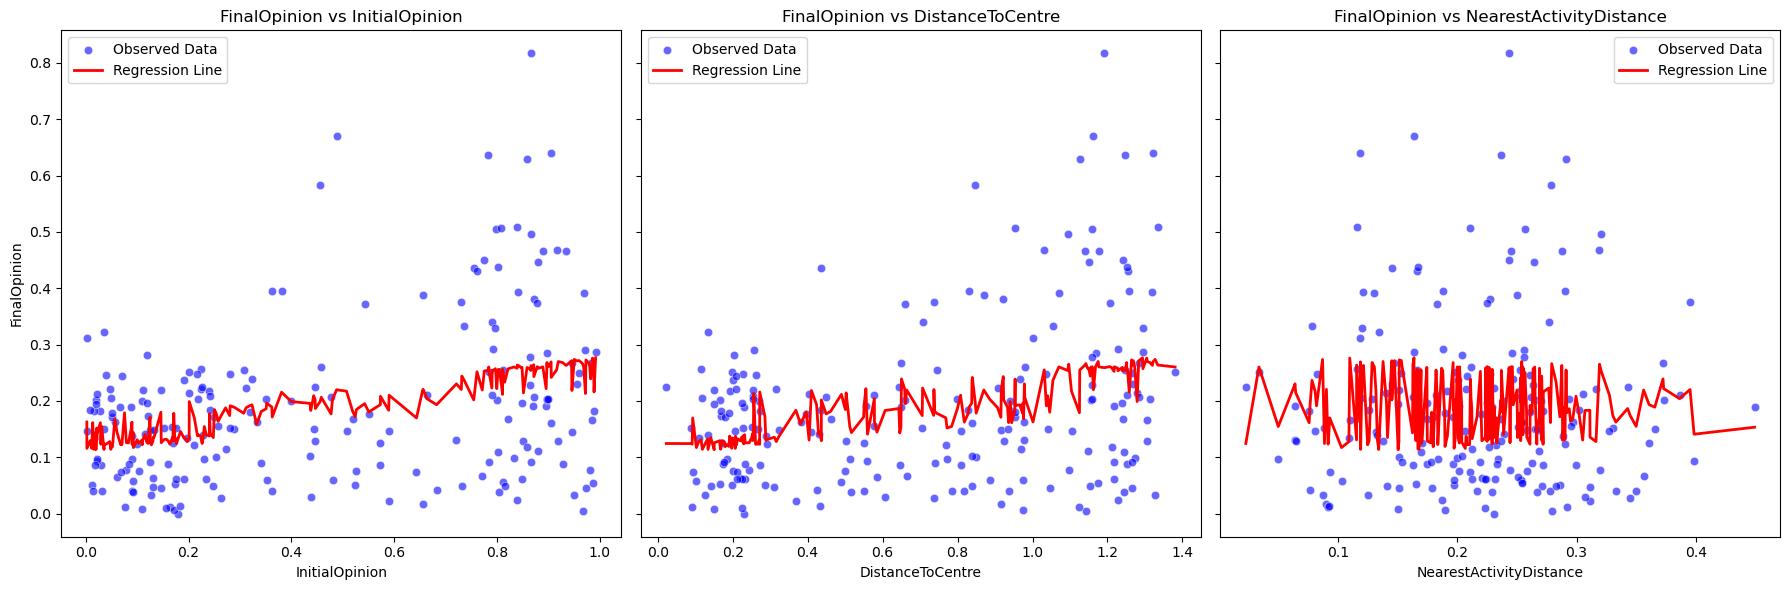

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

model = simulation.fit_regression_model(predictors=["InitialOpinion", "DistanceToCentre", "NearestActivityDistance"])

# Extract data
df = simulation._get_model_data()
predictors = ["InitialOpinion", "DistanceToCentre", "NearestActivityDistance"]
y = df["FinalOpinion"]

# Add constant for intercept
X = sm.add_constant(df[predictors])

# Predict values
y_pred = model.predict(X)

# Create individual scatter plots with regression lines for each predictor
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, predictor in enumerate(predictors):
    # Scatter plot for observed data
    sns.scatterplot(x=df[predictor], y=y, ax=axes[i], color="blue", alpha=0.6, label="Observed Data")
    
    # Regression line
    sorted_indices = np.argsort(df[predictor])
    axes[i].plot(
        df[predictor].iloc[sorted_indices],
        y_pred.iloc[sorted_indices],
        color="red",
        label="Regression Line",
        linewidth=2,
    )
    
    # Customize plot
    axes[i].set_title(f"FinalOpinion vs {predictor}")
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel("FinalOpinion")
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()
